In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../src")
import evidence

In [2]:
def pow_floor(x, base=10):
    return base ** np.floor(np.log(x) / np.log(base))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  2.71it/s]


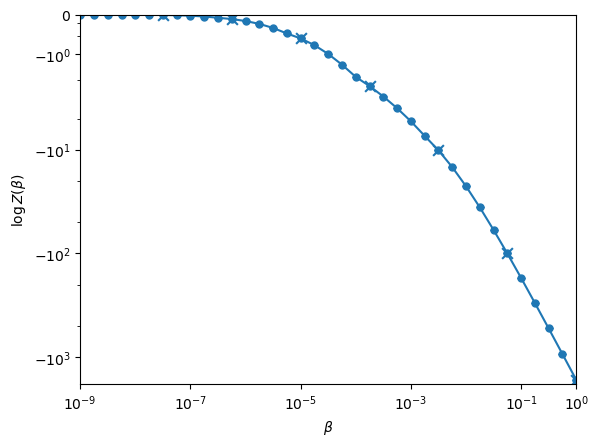

In [3]:
beta_K = np.load(r"C:\Git\film-theckness-estimation\estimator\sl_paper_PA_S36_3\beta_k.npy")
lls = np.load(r"C:\Git\film-theckness-estimation\estimator\sl_paper_PA_S36_3\loglikelihood_n_k_r.npy")
ll_n_k = lls[..., lls.shape[-1]//2:].transpose(1,0,2).reshape(beta_K.size, -1)

log_Z_KB, solvers = evidence.calc_evidence_bootstrap(beta_K, ll_n_k, 6, verbose=True) # n_bootstrap=100: 35.26 sec

means = log_Z_KB.mean(axis=0)
errs = np.abs(np.percentile(log_Z_KB, [25, 75], axis=0) - log_Z_KB.mean(axis=0))
plt.errorbar(
    beta_K, means, yerr=errs,
    fmt="o-", capsize=3, markersize=5)
plt.scatter(beta_K[solvers[0].seams_index], means[solvers[0].seams_index], s=60, marker="x") # type: ignore

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\log Z(\beta)$")
plt.yscale("asinh") # type: ignore
plt.xscale("log")
plt.xlim(pow_floor(beta_K.min()), 1)
plt.ylim(means[beta_K==1]*1.1, 0)
plt.xticks(sorted({x for x in plt.xticks()[0] if pow_floor(beta_K.min())<=x<=1} | {1}))
plt.yticks([y for y in plt.yticks()[0] if not(0<abs(y)<1)])
plt.show()